# This file contains software for preliminary aircraft design developed by Adrian Guzman.
***

The following equations are used to determine wing sizing and power specifications of an aircraft.

1. Maximum Velocity
2. Stall Velocity
3. Rate of Climb

\begin{align}
\frac{P}{W} = (\frac{1}{2} Cd_p \rho V_m^3 (\frac{S}{W}) + \frac{2}{\rho \pi AReV_m}(\frac{W}{S}))
\end{align}

\begin{align}
V_s = \sqrt{ \frac{2}{Cl_m \rho} (\frac{W}{S}) }
\end{align}

\begin{align}
\frac{P}{W} = ROC + \frac{1}{2} Cd_p \rho V_i^3 (\frac{S}{W}) + \frac{2}{\rho \pi AReV_i}(\frac{W}{S})
\end{align}

In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
# Begin by establishing known constants and assumptions.

In [140]:
# Air density in kilograms per cubic meters.

In [141]:
rho = 1.225

In [142]:
# MH-114 airfoil drag coefficient.

In [143]:
cd_airfoil = 0.02

In [144]:
# Aircraft zero-lift drag.

In [145]:
cd_zero = 1.65*cd_airfoil

In [146]:
# Estimate the maximum speed in meters per second.

In [147]:
v_max = 27.432

In [148]:
# Establish Oswald's efficiency.

In [149]:
e = 0.83

In [150]:
# Establish the expected aspect ratio.

In [151]:
ar = 8

In [152]:
# Initialize a range of anticipated wing loading values in Newtons per meters squared.

In [153]:
w_s = np.arange(25, 125, 1)

In [154]:
# Initialize a set of conservative coefficient of lift values.

In [155]:
cl = np.arange(0.9, 1.3, 0.1)

In [156]:
# A minimal ROC is 300 feet per minute, and the recommended overall ROC is 600 feet per minute. 

In [157]:
roc = np.linspace(3.048, 4.8768, 4)

In [158]:
# Set the minimal velocity in meters per second.

In [159]:
v = 3.048

In [160]:
# Set the stall velocity meters per second.

In [161]:
v_stall = 10.668

In [162]:
# Calculating the maximum velocity.

In [163]:
w_p_v_max = ((1/2)*cd_zero*rho*((v_max)**3)*(1/w_s)+(2*w_s)/(rho*np.pi*ar*e*v_max))**(-1)

In [164]:
# Calculating the rate of climb.

In [165]:
w_p_roc = (roc.reshape(1, roc.shape[0]) + (1/2)*cd_zero*rho*(v**3)*(1/w_s.reshape(w_s.shape[0], 1))+(2*w_s.reshape(w_s.shape[0], 1))/(rho*np.pi*ar*e*v))**(-1)

In [166]:
# Calculating the stall velocity.

In [167]:
w_s_stall = ((v_stall**2)*cl*rho)/2

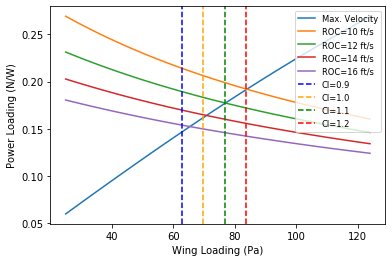

In [168]:
plt.plot(w_s, w_p_v_max), plt.plot(w_s, w_p_roc), plt.ylabel('Power Loading (N/W)'), plt.xlabel('Wing Loading (Pa)'), plt.axvline(w_s_stall[0], color='blue', linestyle='--'), plt.axvline(w_s_stall[1],  color='orange', linestyle='--'),  plt.axvline(w_s_stall[2],  color='green', linestyle='--'),  plt.axvline(w_s_stall[3], color='red', linestyle='--'), plt.legend(loc='upper right', fontsize='small', labels=['Max. Velocity', 'ROC=10 ft/s', 'ROC=12 ft/s', 'ROC=14 ft/s', 'ROC=16 ft/s', 'Cl=0.9', 'Cl=1.0', 'Cl=1.1', 'Cl=1.2'])
plt.show()